In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import random

import os
print(os.listdir("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['animal_0038.jpg', 'animal_0004.jpg', 'animal_0010.jpg', 'cat.239.jpg', 'cat.211.jpg', 'cat.359.jpg', 'cat.403.jpg', 'cat.365.jpg', 'cat.371.jpg', 'cat.417.jpg', 'buddha_0029.jpg', 'image_0032.jpg', 'buddha_0015.jpg', 'image_0026.jpg', 'buddha_0001.jpg', 'ferry_0063.jpg', 'ferry_0062.jpg', 'image_0027.jpg', 'buddha_0014.jpg', 'image_0033.jpg', 'buddha_0028.jpg', 'cat.370.jpg', 'cat.416.jpg', 'cat.402.jpg', 'cat.364.jpg', 'cat.358.jpg', 'cat.210.jpg', 'cat.238.jpg', 'animal_0011.jpg', 'animal_0005.jpg', 'animal_0039.jpg', 'animal_0013.jpg', 'animal_0007.jpg', 'cat.212.jpg', 'cat.399.jpg', 'cat.414.jpg', 'cat.372.jpg', 'cat.366.jpg', 'cat.400.jpg', 'image_0019.jpg', 'image_0025.jpg', 'buddha_0002.jpg', 'image_0031.jpg', 'buddha_0016.jpg', 'ferry_0048.jpg', 'ferry_0060.jpg', 'ferry_0061.jpg', 'ferry_0049.jpg', 'buddha_0017.jpg', 'image_0030.jpg', 'buddha_0003.jpg', 'image_0024.jpg', 'image_0018.jpg', 'cat.367.jpg', 'cat.401.jpg', 'cat.415.jpg', 'cat.373.jpg', 'cat.398.jpg', 'cat.213.jpg'

In [8]:
filenames = os.listdir("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out")
if('.DS_Store' in filenames):
    filenames.remove('.DS_Store')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'la_muse':
        categories.append('la_muse')
    elif category == 'rain_princess':
        categories.append('rain_princess')
    else:
        categories.append('wave')

X = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
X.head()


,filename,category
0,rain_princess.0111.jpg,rain_princess
1,rain_princess.0105.jpg,rain_princess
2,rain_princess.238.jpg,rain_princess
3,rain_princess.210.jpg,rain_princess
4,wave.0037.jpg,wave


In [11]:
df = pd.get_dummies(X,
        columns=['category'])


,filename,category_la_muse,category_rain_princess,category_wave
0,rain_princess.0111.jpg,0,1,0
1,rain_princess.0105.jpg,0,1,0
2,rain_princess.238.jpg,0,1,0
3,rain_princess.210.jpg,0,1,0
4,wave.0037.jpg,0,0,1
5,wave.0023.jpg,0,0,1
6,rain_princess.358.jpg,0,1,0
7,rain_princess.364.jpg,0,1,0
8,rain_princess.402.jpg,0,1,0
9,rain_princess.416.jpg,0,1,0


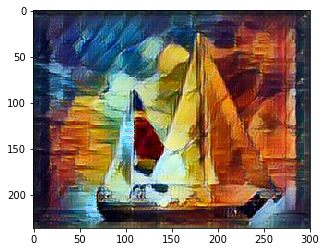

In [7]:
sample = random.choice(filenames)
image = load_img("/Users/roshnidas/Documents/BDS-FinalProject/fast-style-transfer/examples/out/"+sample)
plt.imshow(image)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [13]:
# df = df.sample(n=100).reset_index()
batch_size=15
total_train = df.shape[0]
img_gen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20
)

train_generator = img_gen.flow_from_dataframe(
    df, 
    "/Users/roshnidas/Documents/img/dogs", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    batch_size=batch_size
)

KeyError: 'category'

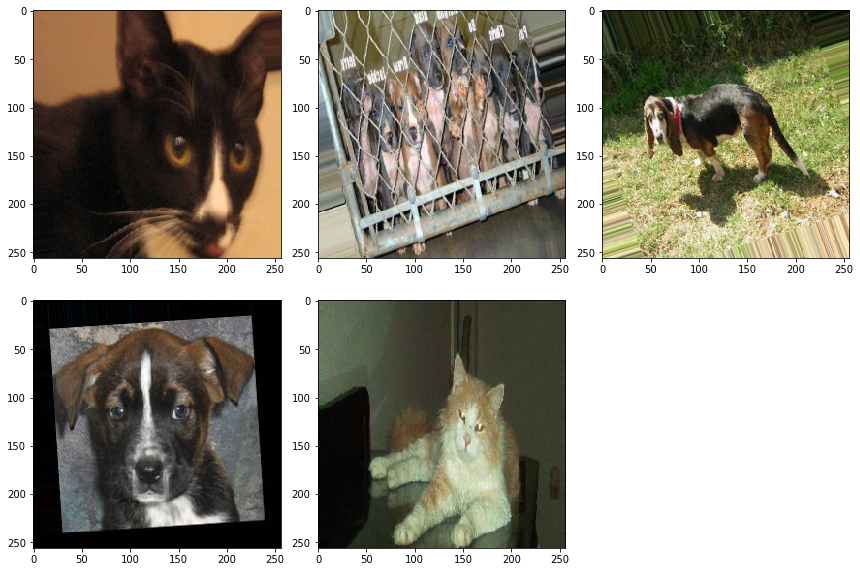

In [73]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_generator:
    for i in range(0, 5):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
    plt.tight_layout()
    plt.show()
    break

In [75]:
model.fit_generator(train_generator, epochs=1, steps_per_epoch=total_train/batch_size)

Epoch 1/1
1667/1666 [==============================] - 2808s 2s/step - loss: 0.6586 - acc: 0.6092


In [76]:
model.save_weights("model.h5")


In [77]:
test_filenames = os.listdir("/Users/roshnidas/Documents/img/test")
test_filenames.remove('.DS_Store')
test_df = pd.DataFrame({
    'filename': test_filenames
})
# test_df = test_df.sample(n=10).reset_index() 
nb_samples = test_df.shape[0]

In [78]:
test_df

,filename
0,8.jpg
1,9.jpg
2,14.jpg
3,15.jpg
4,12.jpg
5,13.jpg
6,11.jpg
7,10.jpg
8,4.jpg
9,5.jpg


In [79]:
test_gen = ImageDataGenerator()
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/roshnidas/Documents/img/test/", 
    x_col='filename',
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

Found 15 images.


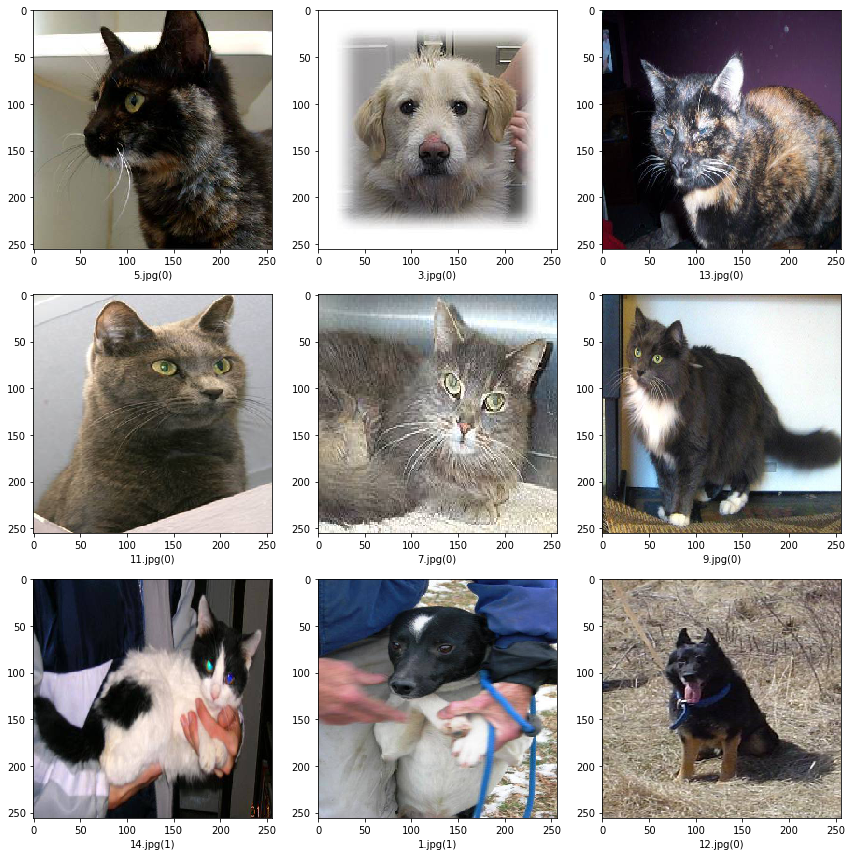

In [80]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size)).astype('int64')
test_df['category'] = predict
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/Users/roshnidas/Documents/img/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [81]:
test_df

,filename,category
0,8.jpg,0
1,9.jpg,0
2,14.jpg,1
3,15.jpg,0
4,12.jpg,0
5,13.jpg,0
6,11.jpg,0
7,10.jpg,0
8,4.jpg,0
9,5.jpg,0
